In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/src")

from models.cnn import CNNTrainer
from data import WaveDataset, SpectrogramDataset
from features import WaveProcessor, WaveProcessorConfig

import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split

import os

In [2]:
wdir = os.getcwd().replace("\\", "/") + "/.."
processed_dir = f"{wdir}/data/processed/musicnet"

spec_dataset = SpectrogramDataset(
    f"{processed_dir}/train_data", split_ratio=0.8
)

token_size = spec_dataset[0][0].shape[0]
seq_size = spec_dataset[0][0].shape[1]
out_size = spec_dataset[0][1].shape[1]

train_set, val_set = random_split(spec_dataset, [0.8, 0.2])

train_loader = DataLoader(train_set, batch_size=5, shuffle=True)
val_loader = DataLoader(val_set, batch_size=5, shuffle=True)

In [3]:
trainer = CNNTrainer()
trainer.create_model(token_size, seq_size, 2, out_size)
trainer.set_dataloaders(train_loader, val_loader, None)
history = trainer.train(0.001, 0.001, 10)

/home/hutiany4/miniconda3/envs/a2a-music-gen/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Epoch: 0 	Training Loss: 58.4635 	Validation Loss: 489.0164
	 	Training Accuracy: 14.31% 	Validation Accuracy: 19.51%

Epoch: 1 	Training Loss: 58.0058 	Validation Loss: 63.4680
	 	Training Accuracy: 21.66% 	Validation Accuracy: 21.68%

Epoch: 2 	Training Loss: 57.7059 	Validation Loss: 56.9658
	 	Training Accuracy: 25.81% 	Validation Accuracy: 21.95%

Epoch: 3 	Training Loss: 57.4728 	Validation Loss: 142.1440
	 	Training Accuracy: 27.90% 	Validation Accuracy: 25.94%

Epoch: 4 	Training Loss: 57.0855 	Validation Loss: 65.5129
	 	Training Accuracy: 29.19% 	Validation Accuracy: 26.96%

Epoch: 5 	Training Loss: 56.8560 	Validation Loss: 388.6118
	 	Training Accuracy: 29.53% 	Validation Accuracy: 27.83%

Epoch: 6 	Training Loss: 56.6206 	Validation Loss: 57.9337
	 	Training Accuracy: 30.11% 	Validation Accuracy: 26.65%

Epoch: 7 	Training Loss: 56.3843 	Validation Loss: 57.0996
	 	Training Accuracy: 31.25% 	Validation Accuracy: 24.74%

Epoch: 8 	Training Loss: 56.2401 	Validation Loss: 4

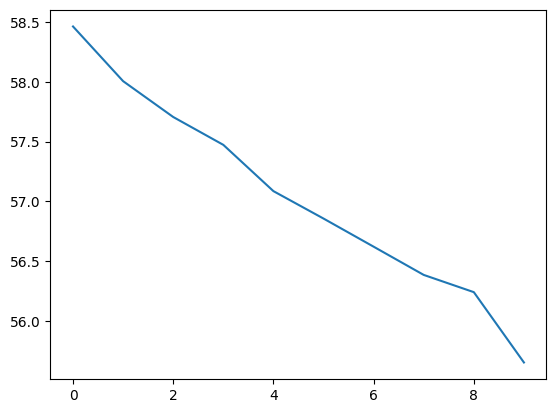

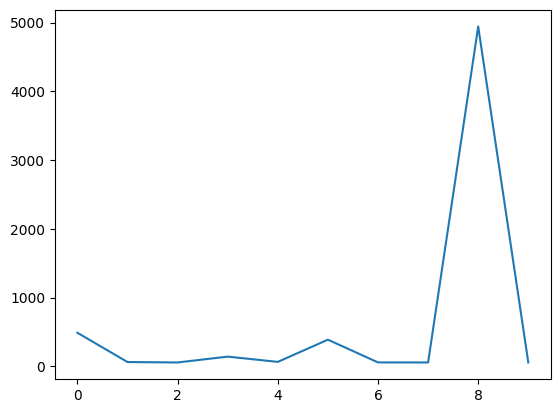

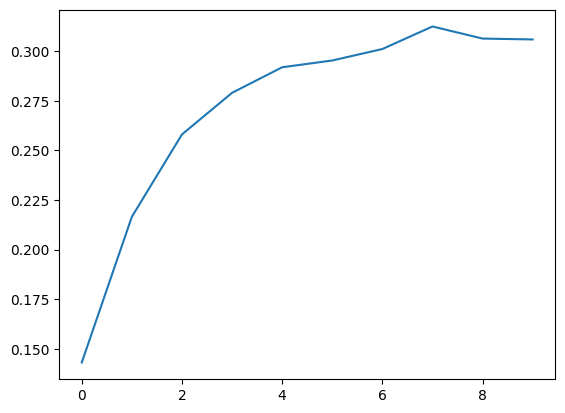

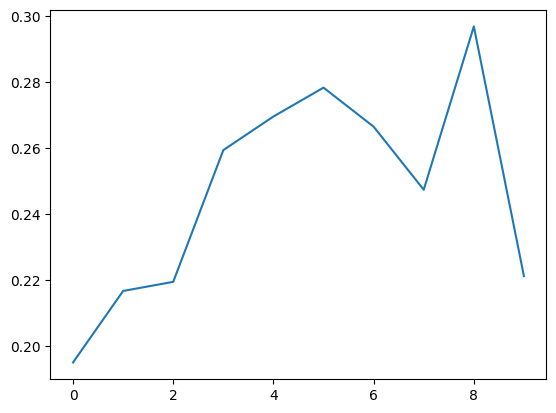

In [4]:
import matplotlib.pyplot as plt
import numpy as np

val_loss = history["val_loss"].to_list()
train_loss = history["train_loss"].to_list()
val_acc = history["val_acc"].to_list()
train_acc = history["train_acc"].to_list()
x = np.arange(history.shape[0])

fig = plt.figure(0)
plt.plot(x, train_loss)
fig = plt.figure(1)
plt.plot(x, val_loss)
fig = plt.figure(2)
plt.plot(x, train_acc)
fig = plt.figure(3)
plt.plot(x, val_acc)
plt.show()